<a href="https://colab.research.google.com/github/nrysam/UCL22_23/blob/main/UCL_22_23_Best_XI_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns

In [115]:
#the data comes in csv files, we need to read using pandas.

df_agk = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl advanced goalkeeping.csv')
df_keeper = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl goalkeeper.csv')
df_defense = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl defensive actions.csv')
df_passing = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl passing.csv')
df_passtype = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl pass types.csv')
df_possession = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl possession.csv')
df_goalsc = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl goal and shot creation.csv')
df_shooting = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl shooting.csv')
df_stdstats = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl standard stats.csv')
df_misc = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl miscellanous.csv')
df_playtime = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl player playing time.csv')

In [116]:
# Defining function to renaming multiple columns by index

def rename_col_by_index(dataframe, index_mapping):
    dataframe.columns = [index_mapping.get(i, col) for i, col in enumerate(dataframe.columns)]
    return dataframe

# Renaming columns using the function
new_column_mapping = {12: 'Offsides', 13: 'Crosses', 14: 'Interceptions', 15: 'Tackles won', 16: 'penalties won', 17: 'penalties comitted', 18: 'own goals', 19:'ball recoveries', 20:'Aerial Duels won', 21: 'Aerial Duels lost', 22: 'Aerial Duels won%'}
df_misc = rename_col_by_index(df_misc, new_column_mapping)
print(df_misc.columns)

Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', '90s',
       'Yellow Cards', 'Red Cards', '2nd Yellows', 'Fouls Comitted',
       'Fouls Drawn', 'Offsides', 'Crosses', 'Interceptions', 'Tackles won',
       'penalties won', 'penalties comitted', 'own goals', 'ball recoveries',
       'Aerial Duels won', 'Aerial Duels lost', 'Aerial Duels won%'],
      dtype='object')


In [117]:
#Check All the columns in UCL Passing Data.
print(df_passing.columns)

#The Column name 'Club ' has space in it. We need to rename it to 'Club' in order
df_passing= df_passing.rename(columns={'Club ': 'Club'})

Index(['Player', 'Nationality', 'Position', 'Club ', 'Age', 'Born', '90s',
       'Total Passes completed', 'Total Passes attempted',
       'Total Passes completion %', 'Total passing distance',
       'Progressive passing distance', 'Passes attempted (short)',
       'Passes completed (short)', 'Passes completed (short) %',
       'Passes attempted (medium)', 'Passes completed (medium)',
       'Passes completed (medium) %', 'Passes attempted (long)',
       'Passes completed (long)', 'Passes completed (long) %', 'Assists',
       'Expected Assist Goals (xAG)', 'xA', 'A-xAG', 'Key Passes',
       'Passes into Final third', 'Passes into Penalty Area',
       'Crosses into Penalty Area', 'Progressive passes'],
      dtype='object')


In [118]:
print(df_stdstats.columns)
df_stdstats= df_stdstats.rename(columns={'Pos': 'Position'})
print(df_stdstats.columns)

Index(['Player', 'Nationality', 'Pos', 'Club', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'Goals', 'Assists', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdYellow', 'CrdRed', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP',
       'PrgR', 'Gls', 'Ast', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1',
       'xG+xAG', 'npxG.1', 'npxG+xAG.1'],
      dtype='object')
Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Goals', 'Assists', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdYellow', 'CrdRed', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'Gls', 'Ast', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1',
       'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1'],
      dtype='object')


In [119]:
#Check on df_agk Dataframe
df_agk.head(30)

,Player,Nationality,Position,Club,Age,Born,90s,GA,PKA,FK,...,AvgLen,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,Antonio Adán,ESP,GK,Sporting CP,35,1987,4.2,5,1,0,...,30.5,35,51.4,37,82,9,11,3,0.71,9.2
1,Alisson,BRA,GK,Liverpool,29,1992,8,12,1,0,...,26.5,37,24.3,31.6,56,7,12.5,10,1.25,17.4
2,Kepa Arrizabalaga,ESP,GK,Chelsea,27,1994,9,8,0,0,...,30,46,56.5,44.2,88,6,6.8,10,1.11,17.3
3,Janis Blaswich,GER,GK,RB Leipzig,31,1991,5.9,11,2,0,...,25.6,35,14.3,26.8,83,5,6,4,0.68,14.5
4,Yassine Bounou,MAR,GK,Sevilla,31,1991,4,12,0,0,...,28.5,43,53.5,43.6,53,6,11.3,4,1,11.4
5,Josh Cohen,USA,GK,Maccabi Haifa,29,1992,6,21,0,1,...,32.5,39,43.6,34.6,82,4,4.9,8,1.33,17.2
6,Diogo Costa,POR,GK,Porto,22,1999,8,8,1,0,...,36.1,48,58.3,46.7,117,9,7.7,8,1,13.6
7,Thibaut Courtois,BEL,GK,Real Madrid,30,1992,10,11,0,1,...,30,54,44.4,42.9,134,9,6.7,5,0.5,11.5
8,Marko Dmitrović,SRB,GK,Sevilla,30,1992,2,0,0,0,...,32.7,9,66.7,48.6,20,2,10,0,0,7.8
9,Gianluigi Donnarumma,ITA,GK,Paris S-G,23,1999,8,10,1,0,...,25.1,46,19.6,23.7,99,2,2,8,1,13.3


In [120]:
# In index 25, there is abnormal data in df_agk Dataframe
# We need to filter the DataFrame to include only rows where the 'Age' column contains digit-only values.
# This is important to ensure that the 'Age' column has consistently formatted and valid numerical data.
df_agk = df_agk[df_agk['Age'].apply(lambda x: str(x).isdigit())]

# Display the resulting DataFrame after filtering.
df_agk

,Player,Nationality,Position,Club,Age,Born,90s,GA,PKA,FK,...,AvgLen,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,Antonio Adán,ESP,GK,Sporting CP,35,1987,4.2,5,1,0,...,30.5,35,51.4,37,82,9,11,3,0.71,9.2
1,Alisson,BRA,GK,Liverpool,29,1992,8,12,1,0,...,26.5,37,24.3,31.6,56,7,12.5,10,1.25,17.4
2,Kepa Arrizabalaga,ESP,GK,Chelsea,27,1994,9,8,0,0,...,30,46,56.5,44.2,88,6,6.8,10,1.11,17.3
3,Janis Blaswich,GER,GK,RB Leipzig,31,1991,5.9,11,2,0,...,25.6,35,14.3,26.8,83,5,6,4,0.68,14.5
4,Yassine Bounou,MAR,GK,Sevilla,31,1991,4,12,0,0,...,28.5,43,53.5,43.6,53,6,11.3,4,1,11.4
5,Josh Cohen,USA,GK,Maccabi Haifa,29,1992,6,21,0,1,...,32.5,39,43.6,34.6,82,4,4.9,8,1.33,17.2
6,Diogo Costa,POR,GK,Porto,22,1999,8,8,1,0,...,36.1,48,58.3,46.7,117,9,7.7,8,1,13.6
7,Thibaut Courtois,BEL,GK,Real Madrid,30,1992,10,11,0,1,...,30,54,44.4,42.9,134,9,6.7,5,0.5,11.5
8,Marko Dmitrović,SRB,GK,Sevilla,30,1992,2,0,0,0,...,32.7,9,66.7,48.6,20,2,10,0,0,7.8
9,Gianluigi Donnarumma,ITA,GK,Paris S-G,23,1999,8,10,1,0,...,25.1,46,19.6,23.7,99,2,2,8,1,13.3


In [121]:
df_agk.dtypes

Player         object
Nationality    object
Position       object
Club           object
Age            object
Born           object
90s            object
GA             object
PKA            object
FK             object
CK             object
OG             object
PSxG           object
PSxG/SoT       object
PSxG+/-        object
/90            object
Cmp            object
Att            object
Cmp%           object
Att.1          object
Thr            object
Launch%        object
AvgLen         object
Att.2          object
Launch%.1      object
AvgLen.1       object
Opp            object
Stp            object
Stp%           object
#OPA           object
#OPA/90        object
AvgDist        object
dtype: object

In [122]:
#We need some of the data above to be float.
df_agk[['PSxG+/-','Stp','Stp%','#OPA/90','AvgDist']] = df_agk[['PSxG+/-','Stp','Stp%','#OPA/90','AvgDist']].astype(float)
df_agk[['PSxG+/-','Stp','Stp%','#OPA/90','AvgDist']].dtypes

<ipython-input-122-85878b10e794>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agk[['PSxG+/-','Stp','Stp%','#OPA/90','AvgDist']] = df_agk[['PSxG+/-','Stp','Stp%','#OPA/90','AvgDist']].astype(float)


PSxG+/-    float64
Stp        float64
Stp%       float64
#OPA/90    float64
AvgDist    float64
dtype: object

In [123]:
# Convert 'Non-penalty goals minus non-penalty expected goals' column to numeric type.
# 'errors='coerce'' argument is used to replace any errors during conversion with NaN (e.g., if there are non-numeric values in this column).
df_shooting['Non-penalty goals minus non-penalty expected goals'] = pd.to_numeric(df_shooting['Non-penalty goals minus non-penalty expected goals'], errors='coerce')

# Convert the 'Non-penalty goals minus non-penalty expected goals' column explicitly to float type.
df_shooting['Non-penalty goals minus non-penalty expected goals'] = df_shooting['Non-penalty goals minus non-penalty expected goals'].astype(float)

# Display the data type of the 'Non-penalty goals minus non-penalty expected goals' column to confirm it's now float.
df_shooting['Non-penalty goals minus non-penalty expected goals'].dtypes

dtype('float64')

In [124]:
# Renaming columns for better understanding

df_agk = df_agk.rename(columns = {'Stp':'CrossStp','Stp%':'CrossStp%'})

In [125]:
import functools as ft

def merge_dataframes(dataframes, suffixes):
    """
    Merges a list of DataFrames using a list of suffixes for duplicate columns.

    Parameters:
    - dataframes: List of DataFrames to merge. The first DataFrame in the list is used as the starting point.
    - suffixes: List of suffixes to apply to duplicate columns, in the order they appear in the list of DataFrames.

    Returns:
    - A single DataFrame with merged data.
    """

    # Check if the length of dataframes and suffixes match
    if len(dataframes) - 1 != len(suffixes):
        raise ValueError("The length of `suffixes` must be one less than the length of `dataframes`.")

    # Define a function to merge with a specific suffix
    def merge_with_suffix(left, right, suffix):
        return pd.merge(left, right, on=['Player', 'Position', 'Club'], suffixes=('', suffix))

    # Initialize the merged DataFrame with the first DataFrame in the list
    merged_df = dataframes[0]

    # Iteratively merge each DataFrame in the list with the appropriate suffix
    for dataframe, suffix in zip(dataframes[1:], suffixes):
        merge_with_suffix_partial = ft.partial(merge_with_suffix, suffix=suffix)
        merged_df = merge_with_suffix_partial(merged_df, dataframe)

    # Drop duplicate columns that end with the suffixes
    columns_to_drop = [col for col in merged_df.columns if col.endswith(tuple(suffixes))]
    merged_df = merged_df.drop(columns=columns_to_drop)

    return merged_df

# Usage for midfielders (GK)
dfjoin_gk = [df_agk, df_keeper, df_defense, df_passing, df_possession]
suffixes_gk = ['_agk', '_keeper', '_defense', '_passing', '_possession']
df_gk = merge_dataframes(dfjoin_gk, suffixes_gk[1:])

# Usage for midfielders (DF)
dfjoin_df = [df_defense, df_misc, df_passing, df_possession, df_goalsc, df_passtype]
suffixes_df = ['_defense', '_misc', '_passing', '_possession', '_goalsc', '_passtype']
df_df = merge_dataframes(dfjoin_df, suffixes_df[1:])

# Usage for midfielders (MF)
dfjoin_mf = [df_defense, df_misc, df_passing, df_possession, df_goalsc, df_shooting]
suffixes_mf = ['_defense', '_misc', '_passing', '_possession', '_goalsc', '_shooting']
df_mf = merge_dataframes(dfjoin_mf, suffixes_mf[1:])

# Usage for forwards (FW)
dfjoin_fw = [df_passing, df_possession, df_goalsc, df_shooting, df_misc]
suffixes_fw = ['_passing', '_possession', '_goalsc', '_shooting', '_misc']
df_fw = merge_dataframes(dfjoin_fw, suffixes_fw[1:])


In [126]:
#Defining metrics for each position
gk_metrics = [
    'Saves',
    'Save%',
    'CS',
    'CS%',
    'PKsv',
    'PSxG+/-',
    '#OPA/90',
    'AvgDist',
    'CrossStp',
    'CrossStp%',
    'Clearances',
    'Errors',
    'Total Passes completion %',
    'Passes completed (long) %',
    'Key Passes',
    'Passes into Final third',
    'Touches',
    'Miscontrols',
    'Dispossessed',
    'Passes received'
]

cb_metrics = [
    'SCA(Def)', 'penalties comitted', 'own goals', 'Tackles won', 'Tackles (Def 3rd)',
    'Tackles (Mid 3rd)', '% of dribblers successfully tackled', 'challenges lost', 'Blocks', 'Shots blocked',
    'Passes blocked', 'Interceptions', 'Clearances', 'Errors', 'Touches (Def 3rd)',
    'Touches (Mid 3rd)', 'Miscontrols', 'Dispossessed', 'Passes received',
    'Passes completed (short)', 'Passes completed (short) %', 'Passes completed (medium)',
    'Passes completed (medium) %', 'Touches (Def Pen)', 'Aerial Duels won',
    'Aerial Duels won%', 'Progressive passing distance'
]

fb_metrics = [
    'SCA/90',
    'Tackles (Def 3rd)',
    'Tackles (Mid 3rd)',
    'Tackles (Att 3rd)',
    'No. of dribblers tackled',
    'Dribbles challenged (total)',
    'Passes blocked',
    'Interceptions',
    'Touches (Mid 3rd)',
    'Touches (Att 3rd)',
    'Take-ons completed',
    'Times tackled during takeon',
    'Progressive carries',
    'Carries into final third',
    'Carries into penalty area',
    'Progressive passes received',
    'Switches',
    'Assists',
    'Expected Assist Goals (xAG)',
    'xA',
    'Key Passes',
    'Passes into Final third',
    'Passes into Penalty Area',
    'Crosses into Penalty Area',
    'Progressive passes'
]

dmf_metrics = [
    'SCA(Def)',
    'ball recoveries',
    'Tackles (Def 3rd)',
    'Tackles (Mid 3rd)',
    '% of dribblers successfully tackled',
    'challenges lost',
    'Blocks',
    'Passes blocked',
    'Interceptions',
    'Clearances',
    'Errors',
    'Touches (Def 3rd)',
    'Touches (Mid 3rd)',
    'Touches (Att 3rd)',
    'Progressive carrying distance',
    'Progressive carries',
    'Miscontrols',
    'Dispossessed',
    'Progressive passes received',
    'Passes completed (short) %',
    'Passes completed (medium) %',
    'Passes completed (long) %',
    'Key Passes'
]

omf_metrics = [
    'SCA',
    'SCA/90',
    'SCA (PassLive)',
    'GCA/90',
    'GCA (PassLive)',
    'Touches (Mid 3rd)',
    'Touches (Att 3rd)',
    'Touches (Att Pen)',
    'Take-ons completed',
    'successful takeon (%)',
    'Carries',
    'Progressive carries',
    'Carries into final third',
    'Carries into penalty area',
    'Miscontrols',
    'Dispossessed',
    'Goals/shot on target',
    'Non-penalty expected goals',
    'Total Passes completed',
    'Total Passes completion %',
    'Passes completed (short) %',
    'Passes completed (medium)',
    'Passes completed (medium) %',
    'Passes completed (long) %',
    'Assists',
    'xA',
    'Expected Assist Goals (xAG)',
    'Key Passes',
    'Passes into Final third',
    'Passes into Penalty Area',
    'Crosses into Penalty Area',
    'Progressive passes'
]

cf_metrics = [
    'SCA/90',
    'SCA(Sh)',
    'Goals',
    'Shots on target',
    'Shots on target %',
    'Shots Total/90',
    'Shots on target/90',
    'Goals/shot on target',
    'Non-penalty expected goals',
    'non-penalty expected goals/shot',
    'Goals minus expected goals',
    'Non-penalty goals minus non-penalty expected goals',
    'Expected Assist Goals (xAG)',
    'Carries into penalty area',
    'Key Passes',
    'Aerial Duels won'
]

wf_metrics = [
    'SCA',
    'SCA/90',
    'SCA (PassLive)',
    'SCA (TO)',
    'GCA/90',
    'GCA (TO)',
    'Touches (Att 3rd)',
    'Take-ons completed',
    'successful takeon (%)',
    'Times tackled during takeon',
    'Carries into final third',
    'Carries into penalty area',
    'Miscontrols',
    'Dispossessed',
    'Goals',
    'Shots on target/90',
    'Non-penalty expected goals',
    'Non-penalty goals minus non-penalty expected goals',
    'Assists',
    'Expected Assist Goals (xAG)',
    'A-xAG',
    'Key Passes',
    'Passes into Penalty Area'
]

In [127]:
def process_player_data(df, position, metrics):
    """
    Filters and processes player data for a given position.

    Args:
    df (DataFrame): The input DataFrame containing player data.
    position (str): The position of players to filter (e.g., 'FW').
    metrics (list): List of metrics/columns to include in the output.

    Returns:
    DataFrame: Processed DataFrame for the given position.
    """
    # Filter and fill missing values

    # Filter the DataFrame based on position and select relevant columns
    df_filtered = df[df['Position'] == position][['Player', 'Position', 'Club'] + metrics]

    # Handle missing values
    df_filtered.fillna(0, inplace=True)

    return df_filtered

# Usage
df_gk = process_player_data(df_gk, 'GK', gk_metrics)
display(df_gk.head())
df_cb = process_player_data(df_df, 'DF', cb_metrics)
display(df_cb.head())
df_fb = process_player_data(df_df, 'DF', fb_metrics)
display(df_fb.head())
df_dmf = process_player_data(df_mf, 'MF', dmf_metrics)
display(df_dmf.head())
df_omf = process_player_data(df_mf, 'MF', omf_metrics)
display(df_omf.head())
df_cf = process_player_data(df_fw, 'FW', cf_metrics)
display(df_cf.head())
df_wf = process_player_data(df_fw, 'FW', wf_metrics)
display(df_wf.head())

,Player,Position,Club,Saves,Save%,CS,CS%,PKsv,PSxG+/-,#OPA/90,...,Clearances,Errors,Total Passes completion %,Passes completed (long) %,Key Passes,Passes into Final third,Touches,Miscontrols,Dispossessed,Passes received
0,Antonio Adán,GK,Sporting CP,16,81.0,2,40.0,0,1.1,0.71,...,4,1,69.9,35.1,0,0,235,0,0,119
1,Alisson,GK,Liverpool,15,60.7,3,37.5,1,0.6,1.25,...,1,1,88.3,71.1,0,6,284,0,0,178
2,Kepa Arrizabalaga,GK,Chelsea,27,77.1,3,33.3,0,1.6,1.11,...,2,0,72.9,47.2,0,1,288,0,0,152
3,Janis Blaswich,GK,RB Leipzig,20,71.0,2,40.0,0,-0.8,0.68,...,2,0,83.3,43.1,0,4,280,0,0,191
4,Yassine Bounou,GK,Sevilla,14,53.8,0,0.0,0,-2.8,1.00,...,3,2,79.8,55.2,0,1,224,1,0,123


,Player,Position,Club,SCA(Def),penalties comitted,own goals,Tackles won,Tackles (Def 3rd),Tackles (Mid 3rd),% of dribblers successfully tackled,...,Dispossessed,Passes received,Passes completed (short),Passes completed (short) %,Passes completed (medium),Passes completed (medium) %,Touches (Def Pen),Aerial Duels won,Aerial Duels won%,Progressive passing distance
3,Francesco Acerbi,DF,Inter,0,0,0,8,8,2,57.1,...,0,439,172,89.5,315,92.7,90,25,54.3,3420
10,Manuel Akanji,DF,Manchester City,0,1,0,16,10,15,53.8,...,1,701,332,95.8,396,94.7,38,10,43.5,4176
11,Nathan Aké,DF,Manchester City,1,0,0,6,3,6,60.0,...,1,506,278,97.1,250,91.6,26,14,93.3,3327
12,David Alaba,DF,Real Madrid,0,0,0,3,2,5,41.7,...,2,394,234,93.6,188,87.8,58,2,20.0,2043
14,Jordi Alba,DF,Barcelona,0,0,0,0,0,0,0.0,...,2,149,102,94.1,58,89.7,5,0,0.0,848


,Player,Position,Club,SCA/90,Tackles (Def 3rd),Tackles (Mid 3rd),Tackles (Att 3rd),No. of dribblers tackled,Dribbles challenged (total),Passes blocked,...,Progressive passes received,Switches,Assists,Expected Assist Goals (xAG),xA,Key Passes,Passes into Final third,Passes into Penalty Area,Crosses into Penalty Area,Progressive passes
3,Francesco Acerbi,DF,Inter,0.68,8,2,0,4,7,6,...,1,2,0,0.1,0.1,1,31,0,0,29
10,Manuel Akanji,DF,Manchester City,1.90,10,15,2,14,26,12,...,8,7,0,0.4,0.7,4,55,2,0,44
11,Nathan Aké,DF,Manchester City,1.04,3,6,3,3,5,1,...,9,5,0,0.3,0.4,2,72,2,1,54
12,David Alaba,DF,Real Madrid,1.64,2,5,1,5,12,4,...,26,0,0,0.6,1.4,8,23,3,2,19
14,Jordi Alba,DF,Barcelona,4.32,0,0,0,0,1,1,...,23,0,1,0.6,1.0,5,22,5,2,19


,Player,Position,Club,SCA(Def),ball recoveries,Tackles (Def 3rd),Tackles (Mid 3rd),% of dribblers successfully tackled,challenges lost,Blocks,...,Touches (Att 3rd),Progressive carrying distance,Progressive carries,Miscontrols,Dispossessed,Progressive passes received,Passes completed (short) %,Passes completed (medium) %,Passes completed (long) %,Key Passes
1,Oliver Abildgaard,MF,Celtic,0,4,3,1,50.0,2,1,...,7,25,0,1,2,0,83.3,81.3,50.0,0
2,Mohammad Abu Fani,MF,Maccabi Haifa,0,35,6,1,37.5,5,7,...,83,469,6,6,6,20,87.4,89.0,90.3,9
7,Arijan Ademi,MF,Dinamo Zagreb,0,21,10,6,53.8,6,5,...,42,180,3,7,2,6,87.5,87.5,100.0,3
15,Thiago Alcántara,MF,Liverpool,0,35,5,6,55.6,4,4,...,73,329,3,5,7,3,89.9,92.5,81.6,3
17,Sotiris Alexandropoulos,MF,Sporting CP,0,4,0,1,0.0,0,2,...,10,40,0,4,2,0,85.7,92.3,25.0,0


,Player,Position,Club,SCA,SCA/90,SCA (PassLive),GCA/90,GCA (PassLive),Touches (Mid 3rd),Touches (Att 3rd),...,Passes completed (medium) %,Passes completed (long) %,Assists,xA,Expected Assist Goals (xAG),Key Passes,Passes into Final third,Passes into Penalty Area,Crosses into Penalty Area,Progressive passes
1,Oliver Abildgaard,MF,Celtic,0,0.00,0,0.00,0,24,7,...,81.3,50.0,0,0.0,0.0,0,0,0,0,2
2,Mohammad Abu Fani,MF,Maccabi Haifa,20,4.50,13,0.23,1,153,83,...,89.0,90.3,0,0.7,0.6,9,22,7,0,29
7,Arijan Ademi,MF,Dinamo Zagreb,3,0.57,3,0.00,0,99,42,...,87.5,100.0,0,0.1,0.1,3,8,1,0,10
15,Thiago Alcántara,MF,Liverpool,13,3.80,12,0.58,2,153,73,...,92.5,81.6,0,0.9,0.5,3,36,6,0,30
17,Sotiris Alexandropoulos,MF,Sporting CP,1,0.74,1,0.00,0,32,10,...,92.3,25.0,0,0.0,0.0,0,2,0,0,3


,Player,Position,Club,SCA/90,SCA(Sh),Goals,Shots on target,Shots on target %,Shots Total/90,Shots on target/90,Goals/shot on target,Non-penalty expected goals,non-penalty expected goals/shot,Goals minus expected goals,Non-penalty goals minus non-penalty expected goals,Expected Assist Goals (xAG),Carries into penalty area,Key Passes,Aerial Duels won
5,Junior Adamu,FW,RB Salzburg,2.20,0,1,3,60.0,2.21,1.32,0.33,1.3,0.26,-0.3,-0.3,0.4,1,2,4
23,Julián Álvarez,FW,Manchester City,3.61,1,3,6,42.9,2.66,1.14,0.50,2.4,0.17,0.6,0.6,1.0,5,8,4
29,Henrique Araújo,FW,Benfica,20.00,0,1,1,100.0,10.00,10.00,1.00,0.2,0.23,0.8,0.8,0.1,0,2,1
32,Hákon Arnar Haraldsson,FW,FC Copenhagen,2.11,1,1,4,50.0,2.42,1.21,0.25,1.0,0.12,0.0,0.0,0.2,1,1,0
38,Pierre-Emerick Aubameyang,FW,Chelsea,1.79,1,2,8,53.3,3.35,1.79,0.25,2.3,0.15,-0.3,-0.3,0.5,4,6,3


,Player,Position,Club,SCA,SCA/90,SCA (PassLive),SCA (TO),GCA/90,GCA (TO),Touches (Att 3rd),...,Dispossessed,Goals,Shots on target/90,Non-penalty expected goals,Non-penalty goals minus non-penalty expected goals,Assists,Expected Assist Goals (xAG),A-xAG,Key Passes,Passes into Penalty Area
5,Junior Adamu,FW,RB Salzburg,5,2.20,5,0,0.44,0,38,...,6,1,1.32,1.3,-0.3,1,0.4,0.6,2,2
23,Julián Álvarez,FW,Manchester City,19,3.61,14,1,0.76,0,106,...,6,3,1.14,2.4,0.6,2,1.0,1.0,8,4
29,Henrique Araújo,FW,Benfica,2,20.00,2,0,0.00,0,7,...,0,1,10.00,0.2,0.8,0,0.1,-0.1,2,1
32,Hákon Arnar Haraldsson,FW,FC Copenhagen,7,2.11,4,0,0.00,0,50,...,2,1,1.21,1.0,0.0,0,0.2,-0.2,1,1
38,Pierre-Emerick Aubameyang,FW,Chelsea,8,1.79,7,0,0.22,0,73,...,5,2,1.79,2.3,-0.3,1,0.5,0.5,6,4


In [128]:
# Define the metrics for analysis
gk_metrics_for_analysis = df_gk.columns.difference(['Player', 'Position', 'Club'])
cb_metrics_for_analysis = df_cb.columns.difference(['Player', 'Position', 'Club'])
fb_metrics_for_analysis = df_fb.columns.difference(['Player', 'Position', 'Club'])
dmf_metrics_for_analysis = df_dmf.columns.difference(['Player', 'Position', 'Club'])
omf_metrics_for_analysis = df_omf.columns.difference(['Player', 'Position', 'Club'])
cf_metrics_for_analysis = df_cf.columns.difference(['Player', 'Position', 'Club'])
wf_metrics_for_analysis = df_wf.columns.difference(['Player', 'Position', 'Club'])

# Reset index for continuity
df_gk = df_gk.reset_index(drop=True)
df_cb = df_cb.reset_index(drop=True)
df_fb = df_fb.reset_index(drop=True)
df_dmf = df_dmf.reset_index(drop=True)
df_omf = df_omf.reset_index(drop=True)
df_cf = df_cf.reset_index(drop=True)
df_wf = df_wf.reset_index(drop=True)

In [129]:
def normalize_and_weight(df, metrics, weights):
    """
    Normalizes the specified metrics within a DataFrame to a 0-1 range and applies specified weights.

    This function takes a DataFrame and a list of metrics to be normalized. Each metric is scaled to a 0-1 range based
    on its minimum and maximum values within the DataFrame. Weights are then applied to these normalized metrics if specified.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the metrics to be normalized.
    - metrics (list of str): A list of column names in the DataFrame representing the metrics to normalize.
    - weights (dict): A dictionary where keys are metric names and values are the weights to apply. Metrics not in this dictionary will not be weighted but will still be normalized.

    Returns:
    - pd.DataFrame: A DataFrame with the normalized and weighted metrics.
    """

    # Normalize metrics to a 0-1 range
    for metric in metrics:
        min_val = df[metric].min()  # Find the minimum value for the metric
        max_val = df[metric].max()  # Find the maximum value for the metric
        # Normalize the metric to a 0-1 range
        df[metric] = (df[metric] - min_val) / (max_val - min_val)

    # Apply weights to the normalized metrics
    for metric in metrics:
        if metric in weights:  # Check if the metric has a specified weight
            df[metric] *= weights[metric]  # Apply the weight

    return df

In [130]:
#Function for Standard Scaling
from sklearn.preprocessing import StandardScaler

def standard_scale(df, metrics):
    """
    Applies standard scaling to specified metrics within a DataFrame.

    This function uses scikit-learn's StandardScaler to transform the specified metrics in the DataFrame
    to have a mean of 0 and a standard deviation of 1. It is useful for normalizing features before applying
    machine learning algorithms. The non-metric columns such as 'Player', 'Position', and 'Club' are preserved
    and reattached to the scaled metrics.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the metrics to be scaled.
    - metrics (list of str): A list of column names in the DataFrame representing the metrics to scale.

    Returns:
    - pd.DataFrame: A DataFrame with the scaled metrics and the original non-metric columns.
    """

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit and transform the data for the specified metrics
    scaled_data = scaler.fit_transform(df[metrics])

    # Create a new DataFrame for the scaled data
    scaled_df = pd.DataFrame(scaled_data, columns=metrics)

    # Preserve the original non-metric columns and add them to the scaled DataFrame
    scaled_df[['Player', 'Position', 'Club']] = df[['Player', 'Position', 'Club']].reset_index(drop=True)

    return scaled_df

In [131]:
# Define weights for each metric for GK position
gk_metric_weights = {
    'Saves' : 10,
    'Save%' : 15,
    'CS' : 10,
    'CS%' : 10,
    'PKsv' : 3,
    'PSxG+/-' : 15,
    '#OPA/90' : 5,
    'AvgDist' : 5,
    'CrossStp' : 3,
    'CrossStp%' : 3,
    'Clearances' : 3,
    'Errors' : -5,
    'Total Passes completion %' : 5,
    'Passes completed (long) %' : 5,
    'Key Passes' : 3,
    'Passes into Final third' : 3,
    'Touches' : 3,
    'Miscontrols' : -3,
    'Dispossessed' : -3,
    'Passes received' : 3
}

In [132]:
# Define weights for each metric for CB position
cb_metric_weights = {
    'SCA(Def)': 12,
    'penalties comitted': -8,
    'own goals': -9,
    'ball recoveries': 12,
    'Tackles won': 15,
    'Tackles (Def 3rd)': 12,
    'Tackles (Mid 3rd)': 14,
    '% of dribblers successfully tackled': 10,
    'challenges lost': -7,
    'Blocks': 10,
    'Shots blocked': 12,
    'Passes blocked': 8,
    'Interceptions': 20,
    'Clearances': 15,
    'Errors': -8,
    'Touches (Def 3rd)': 11,
    'Touches (Mid 3rd)': 10,
    'Miscontrols': -7,
    'Dispossessed': -7,
    'Passes received': 8,
    'Passes completed (short)': 8,
    'Passes completed (short) %': 8,
    'Passes completed (medium)': 5,
    'Passes completed (medium) %': 5,
    'Touches (Def Pen)': 5,
    'Aerial Duels won': 12,
    'Aerial Duels won%': 12,
    'Progressive passing distance': 8
}

In [133]:
# Define weights for each metric for FB position
fb_metric_weights = {
    'SCA/90': 8,
    'Tackles (Def 3rd)': 4,
    'Tackles (Mid 3rd)': 6,
    'Tackles (Att 3rd)': 4,
    'No. of dribblers tackled': 3,
    'Dribbles challenged (total)': 3,
    'Passes blocked': 4,
    'Interceptions': 10,
    'Touches (Mid 3rd)': 6,
    'Touches (Att 3rd)': 4,
    'Take-ons completed': 4,
    'Times tackled during takeon': 3,
    'Progressive carries': 10,
    'Carries into final third': 8,
    'Carries into penalty area': 4,
    'Progressive passes received': 8,
    'Switches': 4,
    'Assists': 8,
    'Expected Assist Goals (xAG)': 6,
    'xA': 8,
    'Key Passes': 10,
    'Passes into Final third': 6,
    'Passes into Penalty Area': 6,
    'Crosses into Penalty Area': 4,
    'Progressive passes': 10
}

In [134]:
# Define weights for each metric for DMF position
dmf_metric_weights = {
    'SCA(Def)': 12,
    'ball recoveries': 15,
    'Tackles (Def 3rd)': 15,
    'Tackles (Mid 3rd)': 8,
    '% of dribblers successfully tackled': 12,
    'challenges lost': -8,
    'Passes blocked': 8,
    'Interceptions': 20,
    'Clearances': 10,
    'Errors': -8,
    'Touches (Def 3rd)': 8,
    'Touches (Mid 3rd)': 12,
    'Touches (Att 3rd)': 8,
    'Progressive carrying distance': 10,
    'Progressive carries': 15,
    'Miscontrols': -5,
    'Dispossessed': -8,
    'Progressive passes received': 12,
    'Passes completed (short) %': 10,
    'Passes completed (medium) %': 10,
    'Passes completed (long) %': 10,
}

In [135]:
# Define weights for each metric for OMF position
omf_metric_weights = {
    'SCA': 15,
    'SCA/90': 12,
    'SCA (PassLive)': 10,
    'GCA/90': 12,
    'GCA (PassLive)': 10,
    'Touches (Mid 3rd)': 8,
    'Touches (Att 3rd)': 12,
    'Touches (Att Pen)': 10,
    'Take-ons completed': 12,
    'successful takeon (%)': 10,
    'Carries': 8,
    'Progressive carries': 12,
    'Carries into final third': 12,
    'Carries into penalty area': 10,
    'Miscontrols': -5,
    'Dispossessed': -8,
    'Goals/shot on target': 15,
    'Non-penalty expected goals': 12,
    'Total Passes completed': 10,
    'Total Passes completion %': 8,
    'Passes completed (short) %': 10,
    'Passes completed (medium)': 8,
    'Passes completed (medium) %': 8,
    'Passes completed (long) %': 10,
    'Assists': 15,
    'xA': 15,
    'Expected Assist Goals (xAG)': 15,
    'Key Passes': 20,
    'Passes into Final third': 12,
    'Passes into Penalty Area': 12,
    'Crosses into Penalty Area': 8,
    'Progressive passes': 10,
}

In [136]:
# Define weights for each metric for CF position
cf_metric_weights = {
    'GCA/90': 10,
    'GCA (Sh)': 10,
    'Goals': 30,
    'Shots on target': 20,
    'Shots on target %': 15,
    'Shots Total/90': 15,
    'Shots on target/90': 15,
    'Goals/shot on target': 20,
    'Non-penalty expected goals': 15,
    'non-penalty expected goals/shot': 15,
    'Goals minus expected goals': 10,
    'Non-penalty goals minus non-penalty expected goals': 10,
    'Expected Assist Goals (xAG)': 7,
    'Carries into penalty area': 6,
    'Key Passes': 8,
    'Aerial Duels won': 12
}

In [137]:
# Define weights for each metric for WF position
wf_metric_weights = {
    'SCA': 10,
    'SCA/90': 15,
    'SCA (PassLive)': 10,
    'SCA (TO)': 15,
    'GCA/90': 10,
    'GCA (TO)': 15,
    'Touches (Att 3rd)': 10,
    'Take-ons completed': 15,
    'successful takeon (%)': 12,
    'Times tackled during takeon': 5,
    'Carries into final third': 10,
    'Carries into penalty area': 12,
    'Miscontrols': -5,
    'Dispossessed': -5,
    'Goals': 30,
    'Shots on target/90': 15,
    'Non-penalty expected goals': 15,
    'Non-penalty goals minus non-penalty expected goals': 20,
    'Assists': 12,
    'Expected Assist Goals (xAG)': 10,
    'A-xAG': 10,
    'Key Passes': 15,
    'Passes into Penalty Area': 12
}

In [138]:
df_gk.dtypes

Player                        object
Position                      object
Club                          object
Saves                          int64
Save%                        float64
CS                             int64
CS%                          float64
PKsv                           int64
PSxG+/-                      float64
#OPA/90                      float64
AvgDist                      float64
CrossStp                     float64
CrossStp%                    float64
Clearances                     int64
Errors                         int64
Total Passes completion %    float64
Passes completed (long) %    float64
Key Passes                     int64
Passes into Final third        int64
Touches                        int64
Miscontrols                    int64
Dispossessed                   int64
Passes received                int64
dtype: object

In [139]:
#Applying both methods for data processing for Goalkeeper
df_gk_normalized_weighted = normalize_and_weight(df_gk.copy(), gk_metrics, gk_metric_weights)
df_gk_standardized = standard_scale(df_gk, gk_metrics)

# Display first few rows for comparison
print("Standard Scaler DataFrame:")
print(df_gk_standardized.head())

print("\nWeighted Metrics DataFrame:")
print(df_gk_normalized_weighted.head())

Standard Scaler DataFrame:
      Saves     Save%        CS       CS%      PKsv   PSxG+/-   #OPA/90  \
0 -0.038076  0.728979  0.224592  0.469575 -0.441726  0.204652 -0.386955   
1 -0.136273 -0.713750  0.774841  0.375460  1.361989 -0.038745  0.491161   
2  1.042086  0.451805  0.774841  0.217347 -0.441726  0.448048  0.263501   
3  0.354710  0.018275  0.224592  0.469575 -0.441726 -0.720255 -0.435739   
4 -0.234469 -1.204136 -0.875907 -1.036261 -0.441726 -1.693840  0.084626   

    AvgDist  CrossStp  CrossStp%  ...  Passes completed (long) %  Key Passes  \
0 -1.043547  1.824595   1.266576  ...                  -1.290947   -0.144338   
1  0.643087  1.164779   1.630507  ...                   1.628204   -0.144338   
2  0.622518  0.834870   0.247572  ...                  -0.309787   -0.144338   
3  0.046594  0.504962   0.053475  ...                  -0.642246   -0.144338   
4 -0.591036  0.834870   1.339362  ...                   0.338913   -0.144338   

   Passes into Final third   Touches  Mis

In [140]:
# For Centre Backs
df_cb_normalized_weighted = normalize_and_weight(df_cb.copy(), cb_metrics, cb_metric_weights)
df_cb_standardized = standard_scale(df_cb, cb_metrics)

# Display first few rows for comparison
print("Standard Scaler DataFrame:")
print(df_cb_standardized.head())

print("\nWeighted Metrics DataFrame:")
print(df_cb_normalized_weighted.head())

Standard Scaler DataFrame:
   SCA(Def)  penalties comitted  own goals  Tackles won  Tackles (Def 3rd)  \
0 -0.344921           -0.356506  -0.150414     1.024572           0.954388   
1 -0.344921            2.421785  -0.150414     3.201336           1.475383   
2  2.343081           -0.356506  -0.150414     0.480381          -0.348098   
3 -0.344921           -0.356506  -0.150414    -0.335905          -0.608595   
4 -0.344921           -0.356506  -0.150414    -1.152192          -1.129590   

   Tackles (Mid 3rd)  % of dribblers successfully tackled  challenges lost  \
0          -0.167047                             0.151152         0.105466   
1           4.999111                             0.046744         3.214420   
2           1.422540                             0.242904        -0.239973   
3           1.025143                            -0.336084         1.487224   
4          -0.961841                            -1.655417        -0.585413   

     Blocks  Shots blocked  ...  Pa

In [141]:
# For Full Backs
df_fb_normalized_weighted = normalize_and_weight(df_fb.copy(), fb_metrics, fb_metric_weights)
df_fb_standardized = standard_scale(df_fb, fb_metrics)

# Display first few rows for comparison
print("Standard Scaler DataFrame:")
print(df_fb_standardized.head())

print("\nWeighted Metrics DataFrame:")
print(df_fb_normalized_weighted.head())

Standard Scaler DataFrame:
     SCA/90  Tackles (Def 3rd)  Tackles (Mid 3rd)  Tackles (Att 3rd)  \
0 -0.485831           0.954388          -0.167047          -0.566967   
1  0.430779           1.475383           4.999111           1.623366   
2 -0.215356          -0.348098           1.422540           2.718533   
3  0.235436          -0.608595           1.025143           0.528200   
4  2.248971          -1.129590          -0.961841          -0.566967   

   No. of dribblers tackled  Dribbles challenged (total)  Passes blocked  \
0                  0.061512                     0.090185        1.309970   
1                  3.019341                     3.428587        3.694292   
2                 -0.234271                    -0.261226       -0.676964   
3                  0.357295                     0.968712        0.515196   
4                 -1.121619                    -0.964047       -0.676964   

   Interceptions  Touches (Mid 3rd)  Touches (Att 3rd)  ...  \
0       1.519312    

In [142]:
# For Defensive Midfielders
df_dmf_normalized_weighted = normalize_and_weight(df_dmf.copy(), dmf_metrics, dmf_metric_weights)
df_dmf_standardized = standard_scale(df_dmf, dmf_metrics)

# Display first few rows for comparison
print("Standard Scaler DataFrame:")
print(df_dmf_standardized.head())

print("\nWeighted Metrics DataFrame:")
print(df_dmf_normalized_weighted.head())

Standard Scaler DataFrame:
   SCA(Def)  ball recoveries  Tackles (Def 3rd)  Tackles (Mid 3rd)  \
0 -0.332949        -0.987560          -0.065882          -0.696533   
1 -0.332949         0.624218           0.823519          -0.696533   
2 -0.332949        -0.103682           2.009387           0.714689   
3 -0.332949         0.624218           0.527052           0.714689   
4 -0.332949        -0.987560          -0.955282          -0.696533   

   % of dribblers successfully tackled  challenges lost    Blocks  \
0                             0.242603        -0.440430 -0.853298   
1                            -0.180784         0.270075  0.658763   
2                             0.371313         0.506910  0.154743   
3                             0.432281         0.033240 -0.097267   
4                            -1.450946        -0.914099 -0.601287   

   Passes blocked  Interceptions  Clearances  ...  Miscontrols  Dispossessed  \
0       -0.770044      -0.938059   -0.572247  ...    -0.8

In [143]:
# For Offensive Midfielders
df_omf_normalized_weighted = normalize_and_weight(df_omf.copy(), omf_metrics, omf_metric_weights)
df_omf_standardized = standard_scale(df_omf, omf_metrics)

# Display first few rows for comparison
print("Standard Scaler DataFrame:")
print(df_omf_standardized.head())

print("\nWeighted Metrics DataFrame:")
print(df_omf_normalized_weighted.head())

Standard Scaler DataFrame:
        SCA    SCA/90  SCA (PassLive)    GCA/90  GCA (PassLive)  \
0 -0.987508 -1.187188       -1.043267 -0.524190       -0.560354   
1  1.184375  0.890222        0.882965  0.097722        0.258625   
2 -0.661726 -0.924049       -0.598752 -0.524190       -0.560354   
3  0.424216  0.567070        0.734793  1.044110        1.077604   
4 -0.878914 -0.845569       -0.895096 -0.524190       -0.560354   

   Touches (Mid 3rd)  Touches (Att 3rd)  Touches (Att Pen)  \
0          -0.885877          -0.923608          -0.784678   
1           0.162490           0.549902           0.277833   
2          -0.276361          -0.245018           0.277833   
3           0.162490           0.356019          -0.481103   
4          -0.820862          -0.865443          -0.784678   

   Take-ons completed  successful takeon (%)  ...        xA  \
0           -0.789751              -1.257231  ... -0.796037   
1            1.238858               0.523812  ...  0.766022   
2       

In [144]:
# For Centre Forwards
df_cf_normalized_weighted = normalize_and_weight(df_cf.copy(), cf_metrics, cf_metric_weights)
df_cf_standardized = standard_scale(df_cf, cf_metrics)

# Display first few rows for comparison
print("Standard Scaler DataFrame:")
print(df_cf_standardized.head())

print("\nWeighted Metrics DataFrame:")
print(df_cf_normalized_weighted.head())

Standard Scaler DataFrame:
     SCA/90   SCA(Sh)     Goals  Shots on target  Shots on target %  \
0 -0.301963 -0.762136 -0.212544        -0.179541           0.923062   
1 -0.045012  0.028760  0.741735         0.478776           0.292330   
2  2.941820 -0.762136 -0.212544        -0.618419           2.398459   
3 -0.318365  0.028760 -0.212544         0.039898           0.554213   
4 -0.376680  0.028760  0.264595         0.917654           0.675933   

   Shots Total/90  Shots on target/90  Goals/shot on target  \
0       -0.133524            0.214798              0.371975   
1       -0.054586            0.073549              0.962964   
2        1.232972            7.026127              2.701165   
3       -0.096686            0.128479              0.093863   
4        0.066451            0.583614              0.093863   

   Non-penalty expected goals  non-penalty expected goals/shot  \
0                    0.039275                         2.154105   
1                    0.770387      

In [145]:
# For Winger
df_wf_normalized_weighted = normalize_and_weight(df_wf.copy(), wf_metrics, wf_metric_weights)
df_wf_standardized = standard_scale(df_wf, wf_metrics)

# Display first few rows for comparison
print("Standard Scaler DataFrame:")
print(df_wf_standardized.head())

print("\nWeighted Metrics DataFrame:")
print(df_wf_normalized_weighted.head())

Standard Scaler DataFrame:
        SCA    SCA/90  SCA (PassLive)  SCA (TO)    GCA/90  GCA (TO)  \
0 -0.511899 -0.301963       -0.323162 -0.526596 -0.068670 -0.385402   
1  0.749420 -0.045012        0.791578  0.089633  0.006421 -0.385402   
2 -0.782181  2.941820       -0.694742 -0.526596 -0.171920 -0.385402   
3 -0.331710 -0.318365       -0.447022 -0.526596 -0.171920 -0.385402   
4 -0.241616 -0.376680       -0.075442 -0.526596 -0.120295 -0.385402   

   Touches (Att 3rd)  Take-ons completed  successful takeon (%)  \
0          -0.470128           -0.480402              -0.267921   
1           0.427182           -0.190845              -0.086380   
2          -0.879196           -0.625181              -1.175625   
3          -0.311779           -0.046066               1.246128   
4          -0.008277           -0.625181              -1.175625   

   Times tackled during takeon  ...  Non-penalty expected goals  \
0                    -0.237356  ...                    0.039275   
1        

In [146]:
def calculate_top_players(df, metrics):
    """
    Calculate and return the top n players based on total score.

    :param df: DataFrame containing player data
    :param metrics: list of metric columns to consider for total score
    :param top_n: number of top players to return
    :return: DataFrame with top n players
    """
    # Calculate total score
    df['total_score'] = df[metrics].sum(axis=1)

    # Sort by total score in descending order
    return df.sort_values(by='total_score', ascending=False)

# Calculate top GKs using Standard Scaler
top_gk_standardized = calculate_top_players(df_gk_standardized, gk_metrics_for_analysis)

# Calculate top GKs using Weighted Metrics
top_gk_weighted = calculate_top_players(df_gk_normalized_weighted, gk_metrics_for_analysis)

# Display the top 5 GKs for each method
print("Top 5 Goalkeepers - StandardScaler Method:")
print(top_gk_standardized[['Player', 'Position', 'Club', 'total_score']].head(5))

print("\nTop 5 Goalkeepers - Weighted Metrics Method:")
print(top_gk_weighted[['Player', 'Position', 'Club', 'total_score']].head(5))

Top 5 Goalkeepers - StandardScaler Method:
              Player Position             Club  total_score
6        Diogo Costa       GK            Porto    26.000017
33       André Onana       GK            Inter    22.909245
7   Thibaut Courtois       GK      Real Madrid    17.988537
10           Ederson       GK  Manchester City    15.408721
1            Alisson       GK        Liverpool    12.090994

Top 5 Goalkeepers - Weighted Metrics Method:
              Player Position             Club  total_score
33       André Onana       GK            Inter    73.695361
6        Diogo Costa       GK            Porto    62.615773
10           Ederson       GK  Manchester City    57.979183
7   Thibaut Courtois       GK      Real Madrid    55.332292
30    Simon Mignolet       GK      Club Brugge    53.176496


In [147]:
# Calculate top CBs using Standard Scaler
top_cb_standardized = calculate_top_players(df_cb_standardized, cb_metrics_for_analysis)

# Calculate top CBs using Weighted Metrics
top_cb_weighted = calculate_top_players(df_cb_normalized_weighted, cb_metrics_for_analysis)

# Display the top 5 centre backs for each method
print("Top 5 Centre Backs - StandardScaler Method:")
print(top_cb_standardized[['Player', 'Position', 'Club', 'total_score']].head(5))

print("\nTop 5 Centre Backs - Weighted Metrics Method:")
print(top_cb_weighted[['Player', 'Position', 'Club', 'total_score']].head(5))

Top 5 Centre Backs - StandardScaler Method:
             Player Position             Club  total_score
58       Rúben Dias       DF  Manchester City    51.235684
1     Manuel Akanji       DF  Manchester City    46.347375
87   Theo Hernández       DF            Milan    40.990783
206   Fikayo Tomori       DF            Milan    35.943588
138     Kim Min-jae       DF           Napoli    35.320873

Top 5 Centre Backs - Weighted Metrics Method:
                 Player Position             Club  total_score
58           Rúben Dias       DF  Manchester City   154.185361
138         Kim Min-jae       DF           Napoli   142.144431
148    Nicolás Otamendi       DF          Benfica   125.594456
18   Alessandro Bastoni       DF            Inter   121.872194
1         Manuel Akanji       DF  Manchester City   120.720097


In [148]:
# Calculate top FBs using Standard Scaler
top_fb_standardized = calculate_top_players(df_fb_standardized, fb_metrics_for_analysis)

# Calculate top FBs using Weighted Metrics
top_fb_weighted = calculate_top_players(df_fb_normalized_weighted, fb_metrics_for_analysis)

# Display the top 5 fullbacks for each method
print("Top 5 Fullbacks - StandardScaler Method:")
print(top_fb_standardized[['Player', 'Position', 'Club', 'total_score']].head(5))

print("\nTop 5 Fullbacks - Weighted Metrics Method:")
print(top_fb_weighted[['Player', 'Position', 'Club', 'total_score']].head(5))

Top 5 Fullbacks - StandardScaler Method:
                 Player Position           Club  total_score
76        Álex Grimaldo       DF        Benfica    82.170474
57  Giovanni Di Lorenzo       DF         Napoli    69.866057
51      Alphonso Davies       DF  Bayern Munich    57.706631
61     Federico Dimarco       DF          Inter    56.842740
87       Theo Hernández       DF          Milan    56.333923

Top 5 Fullbacks - Weighted Metrics Method:
                 Player Position     Club  total_score
76        Álex Grimaldo       DF  Benfica   106.157065
57  Giovanni Di Lorenzo       DF   Napoli    99.810959
61     Federico Dimarco       DF    Inter    85.833747
87       Theo Hernández       DF    Milan    80.070360
18   Alessandro Bastoni       DF    Inter    79.853580


In [149]:
# Calculate top DMFs using Standard Scaler
top_dmf_standardized = calculate_top_players(df_dmf_standardized, dmf_metrics_for_analysis)

# Calculate top DMFs using Weighted Metrics
top_dmf_weighted = calculate_top_players(df_dmf_normalized_weighted, dmf_metrics_for_analysis)

# Display the top 5 Defensive Midfielders for each method
print("Top 5 Defensive Midfielders - StandardScaler Method:")
print(top_dmf_standardized[['Player', 'Position', 'Club', 'total_score']].head(5))

print("\nTop 5 Defensive Midfielders - Weighted Metrics Method:")
print(top_dmf_weighted[['Player', 'Position', 'Club', 'total_score']].head(5))

Top 5 Defensive Midfielders - StandardScaler Method:
                 Player Position             Club  total_score
134               Rodri       MF  Manchester City    39.770764
13       Nicolò Barella       MF            Inter    38.818845
85       Joshua Kimmich       MF    Bayern Munich    35.721805
163      Marco Verratti       MF        Paris S-G    33.466251
108  Henrikh Mkhitaryan       MF            Inter    31.448391

Top 5 Defensive Midfielders - Weighted Metrics Method:
                 Player Position             Club  total_score
134               Rodri       MF  Manchester City   122.725121
85       Joshua Kimmich       MF    Bayern Munich   101.114849
91           Toni Kroos       MF      Real Madrid    99.521509
100     Florentino Luís       MF          Benfica    98.646519
108  Henrikh Mkhitaryan       MF            Inter    97.216410


In [150]:
# Calculate top OMFs using Standard Scaler
top_omf_standardized = calculate_top_players(df_omf_standardized, omf_metrics_for_analysis)

# Calculate top OMFs using Weighted Metrics
top_omf_weighted = calculate_top_players(df_omf_normalized_weighted, omf_metrics_for_analysis)

# Display the top 5 Offensive Midfielders for each method
print("Top 5 Offensive Midfielders - StandardScaler Method:")
print(top_omf_standardized[['Player', 'Position', 'Club', 'total_score']].head(5))

print("\nTop 5 Offensive Midfielders - Weighted Metrics Method:")
print(top_omf_weighted[['Player', 'Position', 'Club', 'total_score']].head(5))

Top 5 Offensive Midfielders - StandardScaler Method:
              Player Position             Club  total_score
144       Rafa Silva       MF          Benfica    85.784124
38   Kevin De Bruyne       MF  Manchester City    71.338625
68    İlkay Gündoğan       MF  Manchester City    61.869493
134            Rodri       MF  Manchester City    50.467094
13    Nicolò Barella       MF            Inter    49.218527

Top 5 Offensive Midfielders - Weighted Metrics Method:
              Player Position             Club  total_score
38   Kevin De Bruyne       MF  Manchester City   210.257838
144       Rafa Silva       MF          Benfica   206.993697
68    İlkay Gündoğan       MF  Manchester City   180.931091
85    Joshua Kimmich       MF    Bayern Munich   165.147214
170  Piotr Zieliński       MF           Napoli   163.384024


In [151]:
# Calculate top CFs using Standard Scaler
top_cf_standardized = calculate_top_players(df_cf_standardized, cf_metrics_for_analysis)

# Calculate top CFs using Weighted Metrics
top_cf_weighted = calculate_top_players(df_cf_normalized_weighted, cf_metrics_for_analysis)

# Display the top 5 centre forwards for each method
print("Top 5 Centre Forwards - StandardScaler Method:")
print(top_cf_standardized[['Player', 'Position', 'Club', 'total_score']].head(5))

print("\nTop 5 Centre Forwards - Weighted Metrics Method:")
print(top_cf_weighted[['Player', 'Position', 'Club', 'total_score']].head(5))

Top 5 Centre Forwards - StandardScaler Method:
              Player Position             Club  total_score
38    Erling Haaland       FW  Manchester City    25.681642
43   Vinicius Júnior       FW      Real Madrid    25.511850
91     Mohamed Salah       FW        Liverpool    23.365280
65     Kylian Mbappé       FW        Paris S-G    18.672234
103     Mehdi Taremi       FW            Porto    15.156605

Top 5 Centre Forwards - Weighted Metrics Method:
             Player Position             Club  total_score
38   Erling Haaland       FW  Manchester City   122.793263
43  Vinicius Júnior       FW      Real Madrid    97.676808
91    Mohamed Salah       FW        Liverpool    97.335973
65    Kylian Mbappé       FW        Paris S-G    86.387181
80   Victor Osimhen       FW           Napoli    80.980189


In [152]:
# Calculate top WFs using Standard Scaler
top_wf_standardized = calculate_top_players(df_wf_standardized, wf_metrics_for_analysis)

# Calculate top WFs using Weighted Metrics
top_wf_weighted = calculate_top_players(df_wf_normalized_weighted, wf_metrics_for_analysis)

# Display the top 5 wingers for each method
print("Top 5 Wingers - StandardScaler Method:")
print(top_wf_standardized[['Player', 'Position', 'Club', 'total_score']].head(5))

print("\nTop 5 Wingers - Weighted Metrics Method:")
print(top_wf_weighted[['Player', 'Position', 'Club', 'total_score']].head(5))

Top 5 Wingers - StandardScaler Method:
                   Player Position             Club  total_score
43        Vinicius Júnior       FW      Real Madrid    67.214009
51  Khvicha Kvaratskhelia       FW           Napoli    46.193924
65          Kylian Mbappé       FW        Paris S-G    38.083527
37          Jack Grealish       FW  Manchester City    37.425806
91          Mohamed Salah       FW        Liverpool    30.129599

Top 5 Wingers - Weighted Metrics Method:
                   Player Position             Club  total_score
43        Vinicius Júnior       FW      Real Madrid   166.577242
65          Kylian Mbappé       FW        Paris S-G   130.466445
51  Khvicha Kvaratskhelia       FW           Napoli   124.156917
38         Erling Haaland       FW  Manchester City   113.471406
37          Jack Grealish       FW  Manchester City   110.594761


In [157]:
# Linear transformation function
def linear_transform(x, min_x, max_x, new_min, new_max):
    """
    Performs a linear transformation on a value to scale it to a new range.

    Parameters:
    - x (float): The value to be transformed.
    - min_x (float): The minimum value of the original range.
    - max_x (float): The maximum value of the original range.
    - new_min (float): The minimum value of the new range.
    - new_max (float): The maximum value of the new range.

    Returns:
    - float: The transformed value scaled to the new range.

    This transformation maintains the relative position of `x` within the original range and applies it to the new range.
    """
    return (x - min_x) / (max_x - min_x) * (new_max - new_min) + new_min


def combine_and_select_top_players(df_standardized, df_weighted, original_df, metrics, top_n=5):
    """
    Combine scores from standardized and weighted data, and select top n players.

    :param df_standardized: DataFrame with standardized scores
    :param df_weighted: DataFrame with weighted scores
    :param original_df: Original DataFrame with player details
    :param metrics: list of metric columns
    :param top_n: number of top players to return
    :return: DataFrame with top n players based on combined score
    """
    # Find the min and max values for linear transformation
    min_standardized = df_standardized['total_score'].min()
    max_standardized = df_standardized['total_score'].max()
    min_weighted = df_weighted['total_score'].min()
    max_weighted = df_weighted['total_score'].max()

    # Apply linear transformation
    df_weighted['total_score_transformed'] = df_weighted['total_score'].apply(
        lambda x: linear_transform(x, min_weighted, max_weighted, min_standardized, max_standardized)
    )

    # Combine standardized and weighted scores for a comprehensive evaluation
    combined_df = original_df.copy()
    combined_df['score'] = (df_standardized['total_score'] + df_weighted['total_score_transformed']) / 2

    # Select and return top players
    return combined_df.sort_values(by='score', ascending=False)

# Use the function for Goalkeeper position
top_gk = combine_and_select_top_players(top_gk_standardized, top_gk_weighted, df_gk, gk_metrics_for_analysis)
print("Top 5 Goalkeepers:")
print(top_gk[['Player', 'Club', 'Position', 'score']].head(5))

Top 5 Goalkeepers:
              Player             Club Position      score
33       André Onana            Inter       GK  24.454631
6        Diogo Costa            Porto       GK  22.381512
7   Thibaut Courtois      Real Madrid       GK  15.997045
10           Ederson  Manchester City       GK  15.571590
30    Simon Mignolet      Club Brugge       GK  11.883356


In [158]:
# Use the function for Centre Backs
top_cb = combine_and_select_top_players(top_cb_standardized, top_cb_weighted, df_cb, cb_metrics_for_analysis)
print("Top 5 Centre Backs:")
print(top_cb[['Player', 'Club', 'Position', 'score']].head(5))

# Use the function for Full Backs
top_fb = combine_and_select_top_players(top_fb_standardized, top_fb_weighted, df_fb, fb_metrics_for_analysis)
print("Top 5 Full Backs:")
print(top_fb[['Player', 'Club', 'Position', 'score']].head(5))

Top 5 Centre Backs:
                 Player             Club Position      score
58           Rúben Dias  Manchester City       DF  51.235684
138         Kim Min-jae           Napoli       DF  39.892424
1         Manuel Akanji  Manchester City       DF  39.381249
148    Nicolás Otamendi          Benfica       DF  34.039829
18   Alessandro Bastoni            Inter       DF  33.748291
Top 5 Full Backs:
                 Player           Club Position      score
76        Álex Grimaldo        Benfica       DF  82.170474
57  Giovanni Di Lorenzo         Napoli       DF  72.946300
61     Federico Dimarco          Inter       DF  59.668680
87       Theo Hernández          Milan       DF  56.624383
51      Alphonso Davies  Bayern Munich       DF  55.349835


In [159]:
# Use the function for Defensive Midfielders
top_dmf = combine_and_select_top_players(top_dmf_standardized, top_dmf_weighted, df_dmf, dmf_metrics_for_analysis)
print("Top 5 Defensive Midfielders:")
print(top_dmf[['Player', 'Club', 'Position', 'score']].head(5))

# Use the function for Offensive Midfielder
top_omf = combine_and_select_top_players(top_omf_standardized, top_omf_weighted, df_omf, omf_metrics_for_analysis)
print("Top 5 Offensive Midfielder:")
print(top_omf[['Player', 'Club', 'Position', 'score']].head(5))

Top 5 Defensive Midfielders:
                 Player             Club Position      score
134               Rodri  Manchester City       MF  39.770764
85       Joshua Kimmich    Bayern Munich       MF  31.328685
13       Nicolò Barella            Inter       MF  30.899493
108  Henrikh Mkhitaryan            Inter       MF  28.034260
100     Florentino Luís          Benfica       MF  27.399602
Top 5 Offensive Midfielder:
              Player             Club Position      score
144       Rafa Silva          Benfica       MF  84.789937
38   Kevin De Bruyne  Manchester City       MF  78.561375
68    İlkay Gündoğan  Manchester City       MF  64.894516
134            Rodri  Manchester City       MF  53.377201
91        Toni Kroos      Real Madrid       MF  53.068785


In [160]:
# Use the function for Centre Forwards
top_cf = combine_and_select_top_players(top_cf_standardized, top_cf_weighted, df_cf, cf_metrics_for_analysis)
print("Top 5 Centre Forwards:")
print(top_cf[['Player', 'Club', 'Position', 'score']].head(5))

# Use the function for Winger
top_wf = combine_and_select_top_players(top_wf_standardized, top_wf_weighted, df_wf, wf_metrics_for_analysis)
print("Top 5 Winger:")
print(top_wf[['Player', 'Club', 'Position', 'score']].head(5))

Top 5 Centre Forwards:
             Player             Club Position      score
38   Erling Haaland  Manchester City       FW  25.681642
43  Vinicius Júnior      Real Madrid       FW  21.473450
91    Mohamed Salah        Liverpool       FW  20.344211
65    Kylian Mbappé        Paris S-G       FW  16.200257
2   Henrique Araújo          Benfica       FW  13.440236
Top 5 Winger:
                   Player             Club Position      score
43        Vinicius Júnior      Real Madrid       FW  67.214009
51  Khvicha Kvaratskhelia           Napoli       FW  45.317799
65          Kylian Mbappé        Paris S-G       FW  42.956160
37          Jack Grealish  Manchester City       FW  37.293481
90                Rodrygo      Real Madrid       FW  31.800820


In [161]:
def select_top_n_players(df, position, n):
    # Assuming 'score' is the column representing the performance score
    top_2_players = df[df['Position'] == position].nlargest(n, 'score')
    return top_2_players[['Player', 'Club', 'Position', 'score']]

# Usage for Goalkeeper (GK)
top_1_gk = select_top_n_players(top_gk, 'GK', 1)
print("Top Goalkeeper:")
print(top_1_gk)

Top Goalkeeper:
         Player   Club Position      score
33  André Onana  Inter       GK  24.454631


In [162]:
# usage for Centre Backs (CB)
top_2_cb = select_top_n_players(top_cb, 'DF', 2)
print("Top 2 Centre Backs:")
print(top_2_cb)

# usage for Full Backs (FB)
top_2_fb = select_top_n_players(top_fb, 'DF', 2)
print("\nTop 2 Full Backs:")
print(top_2_fb)

Top 2 Centre Backs:
          Player             Club Position      score
58    Rúben Dias  Manchester City       DF  51.235684
138  Kim Min-jae           Napoli       DF  39.892424

Top 2 Full Backs:
                 Player     Club Position      score
76        Álex Grimaldo  Benfica       DF  82.170474
57  Giovanni Di Lorenzo   Napoli       DF  72.946300


In [163]:
# usage for Defensive Midfielders (DMF)
top_1_dmf = select_top_n_players(top_dmf, 'MF', 1)
print("Top Defensive Midfielders:")
print(top_1_dmf)

# usage for Offensive Midfielders (OMF)
top_2_omf = select_top_n_players(top_omf, 'MF', 2)
print("\nTop 2 Offensive Midfielders:")
print(top_2_omf)

Top Defensive Midfielders:
    Player             Club Position      score
134  Rodri  Manchester City       MF  39.770764

Top 2 Offensive Midfielders:
              Player             Club Position      score
144       Rafa Silva          Benfica       MF  84.789937
38   Kevin De Bruyne  Manchester City       MF  78.561375


In [164]:
# Usage for Centre Forwards (CF)
top_1_cf = select_top_n_players(top_cf, 'FW', 1)
print("Top Centre Forwards:")
print(top_1_cf)

# Usage for Winger (WF)
top_2_wf = select_top_n_players(top_wf, 'FW', 2)
print("\nTop 2 Wingers:")
print(top_2_wf)

Top Centre Forwards:
            Player             Club Position      score
38  Erling Haaland  Manchester City       FW  25.681642

Top 2 Wingers:
                   Player         Club Position      score
43        Vinicius Júnior  Real Madrid       FW  67.214009
51  Khvicha Kvaratskhelia       Napoli       FW  45.317799


<ipython-input-167-63609a0b3bed>:27: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  violin_plot = sns.violinplot(x='Position', y='score', data=all_positions_df, scale='width', inner='quartile')


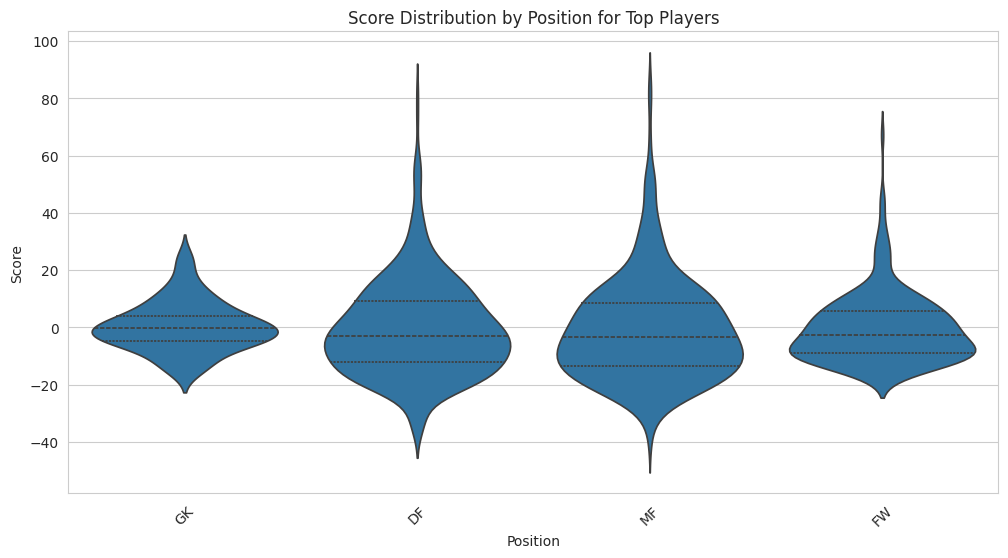

None

In [167]:
def plot_score_distribution_by_position(top_gk, top_cb, top_fb, top_dmf, top_omf, top_cf, top_wf):
    """
    Generates a violin plot to visualize the score distribution across different player positions.

    This function concatenates dataframes for each player position into a single dataframe,
    then generates a violin plot to show the distribution of scores for top players in each position.
    The violin plot illustrates the density of the score distribution, with the quartiles marked inside.

    Parameters:
    - top_gk, top_cb, top_fb, top_dmf, top_omf, top_cf, top_wf: DataFrames of top players for each specified position
      with at least 'Position' and 'score' columns.

    Outputs:
    - A violin plot showing the score distribution by player position.
    """

    # Concatenate the dataframes for all positions into a single dataframe
    all_positions_df = pd.concat([top_gk, top_cb, top_fb, top_dmf, top_omf, top_cf, top_wf])

    # Set the aesthetic style of the plots
    sns.set_style("whitegrid")

    # Create a figure and a set of subplots with a specific size
    plt.figure(figsize=(12, 6))

    # Create the violin plot with 'Position' on the x-axis and 'score' on the y-axis
    violin_plot = sns.violinplot(x='Position', y='score', data=all_positions_df, scale='width', inner='quartile')

    # Customize the plot with a title, x-axis label, and y-axis label
    plt.title('Score Distribution by Position for Top Players')
    plt.xlabel('Position')
    plt.ylabel('Score')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()

display(plot_score_distribution_by_position(top_gk, top_cb, top_fb, top_dmf, top_omf, top_cf, top_wf))

In [169]:
# Combine the selected players into a single DataFrame
xi_of_the_tournament = pd.concat([top_1_gk, top_2_cb, top_2_fb, top_1_dmf, top_2_omf, top_2_wf, top_1_cf])

#Finally, Display the XI of the UCL 22/23
print("Best XI of the UCL 22/23 (Selected Players):")
print(xi_of_the_tournament[['Player', 'Club', 'Position']])

Best XI of the UCL 22/23 (Selected Players):
                    Player             Club Position
33             André Onana            Inter       GK
58              Rúben Dias  Manchester City       DF
138            Kim Min-jae           Napoli       DF
76           Álex Grimaldo          Benfica       DF
57     Giovanni Di Lorenzo           Napoli       DF
134                  Rodri  Manchester City       MF
144             Rafa Silva          Benfica       MF
38         Kevin De Bruyne  Manchester City       MF
43         Vinicius Júnior      Real Madrid       FW
51   Khvicha Kvaratskhelia           Napoli       FW
38          Erling Haaland  Manchester City       FW
